In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from config import *
from datetime import datetime
from pprint import pprint


In [2]:
def getDFFromCSV(filepath):

        df = pd.read_csv(filepath, error_bad_lines=False, encoding="ISO-8859-1")
        
        return df

In [3]:
filepath = "2007-2017_forecast_errors2.csv"

In [4]:
imf_df = getDFFromCSV(filepath)
imf_df.head()

,iso_code,country,2007fe,2008fe,2009fe,2010fe,2011fe,2012fe,2013fe,2014fe,2015fe,2016fe,2017fe
0,MAR,Morocco,1.032,-0.577,-0.759,-0.184,0.622,0.137,-0.605,-0.845,-0.318,-0.624,-0.603
1,AFG,Afghanistan,0.315,-3.619,4.928,-0.425,-0.588,8.745,2.622,-0.542,-0.731,0.367,0.005
2,AGO,Angola,0.102,-2.156,2.172,-2.430,0.193,-1.653,1.268,0.765,-0.488,-0.813,-0.754
3,ALB,Albania,-0.017,1.385,2.654,1.107,0.045,0.917,-0.698,-0.326,-0.470,-0.036,0.232
4,ARE,United Arab Emirates,-4.442,-3.749,-5.057,-0.800,3.059,1.070,1.743,-0.995,0.831,0.773,-0.806


In [5]:
len(imf_df)

193

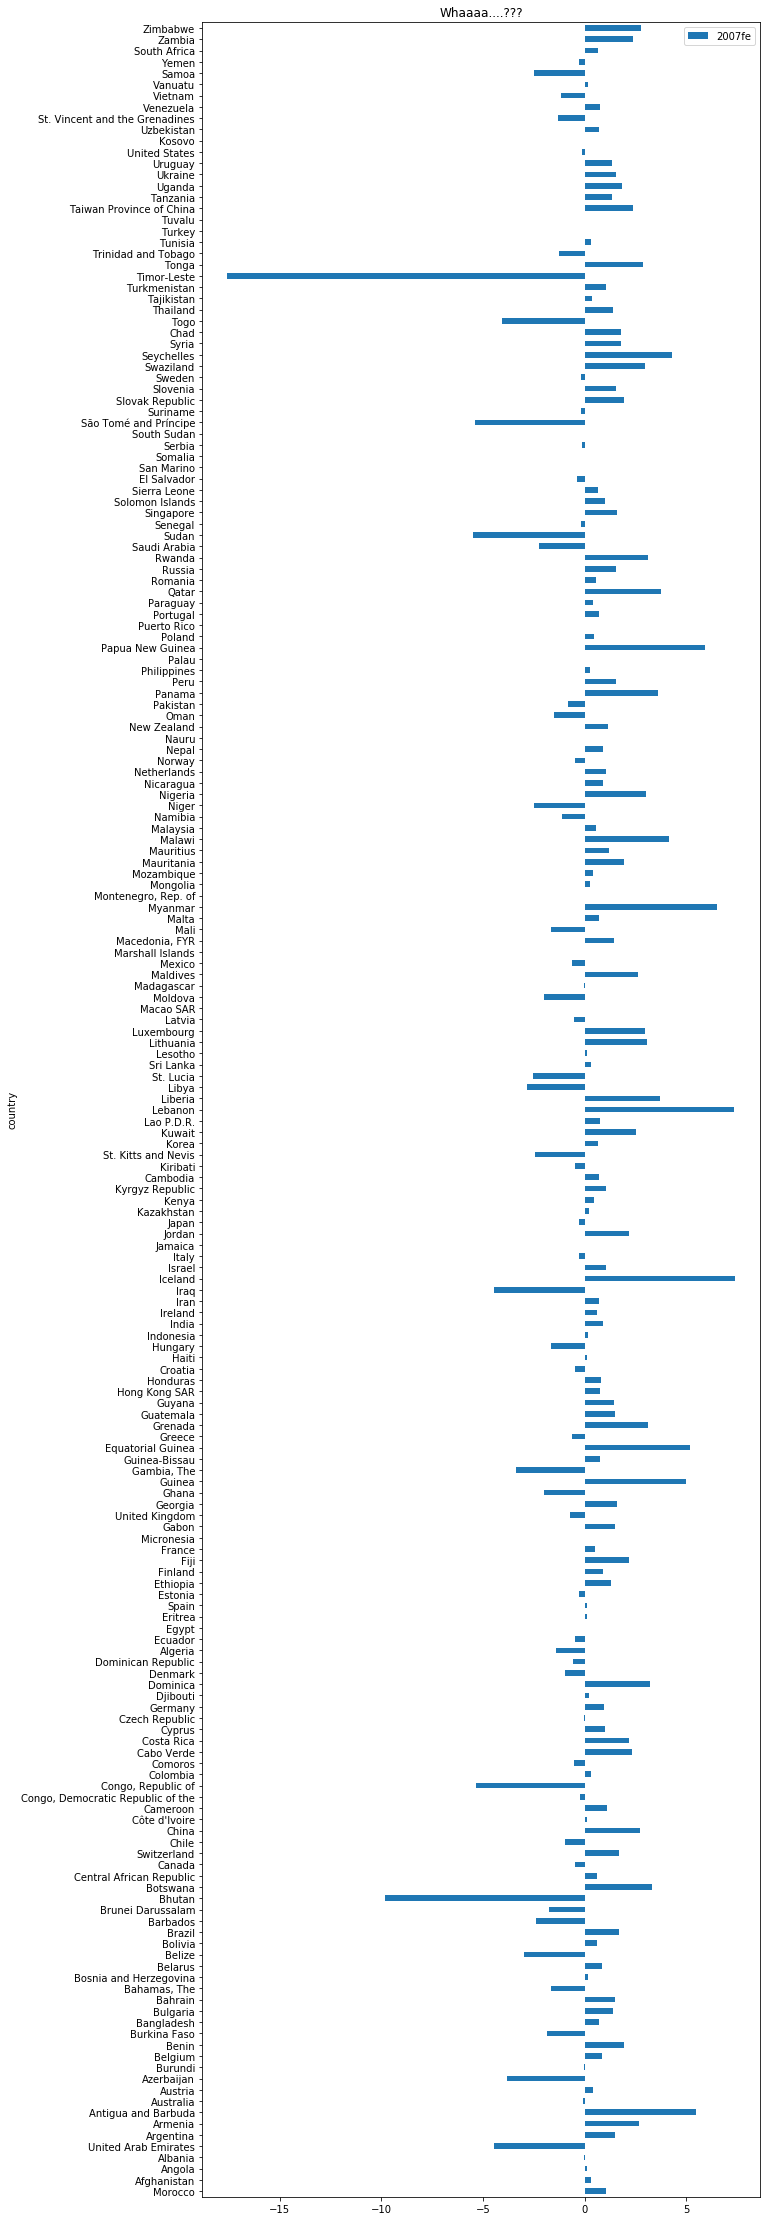

In [6]:
imf_df[['country', '2007fe']].plot(kind='barh',x='country', y='2007fe', figsize=(10, 40))
plt.title('Whaaaa....???')
plt.show()

In [7]:
imf_df['2007fe'] = imf_df['2007fe'].abs()


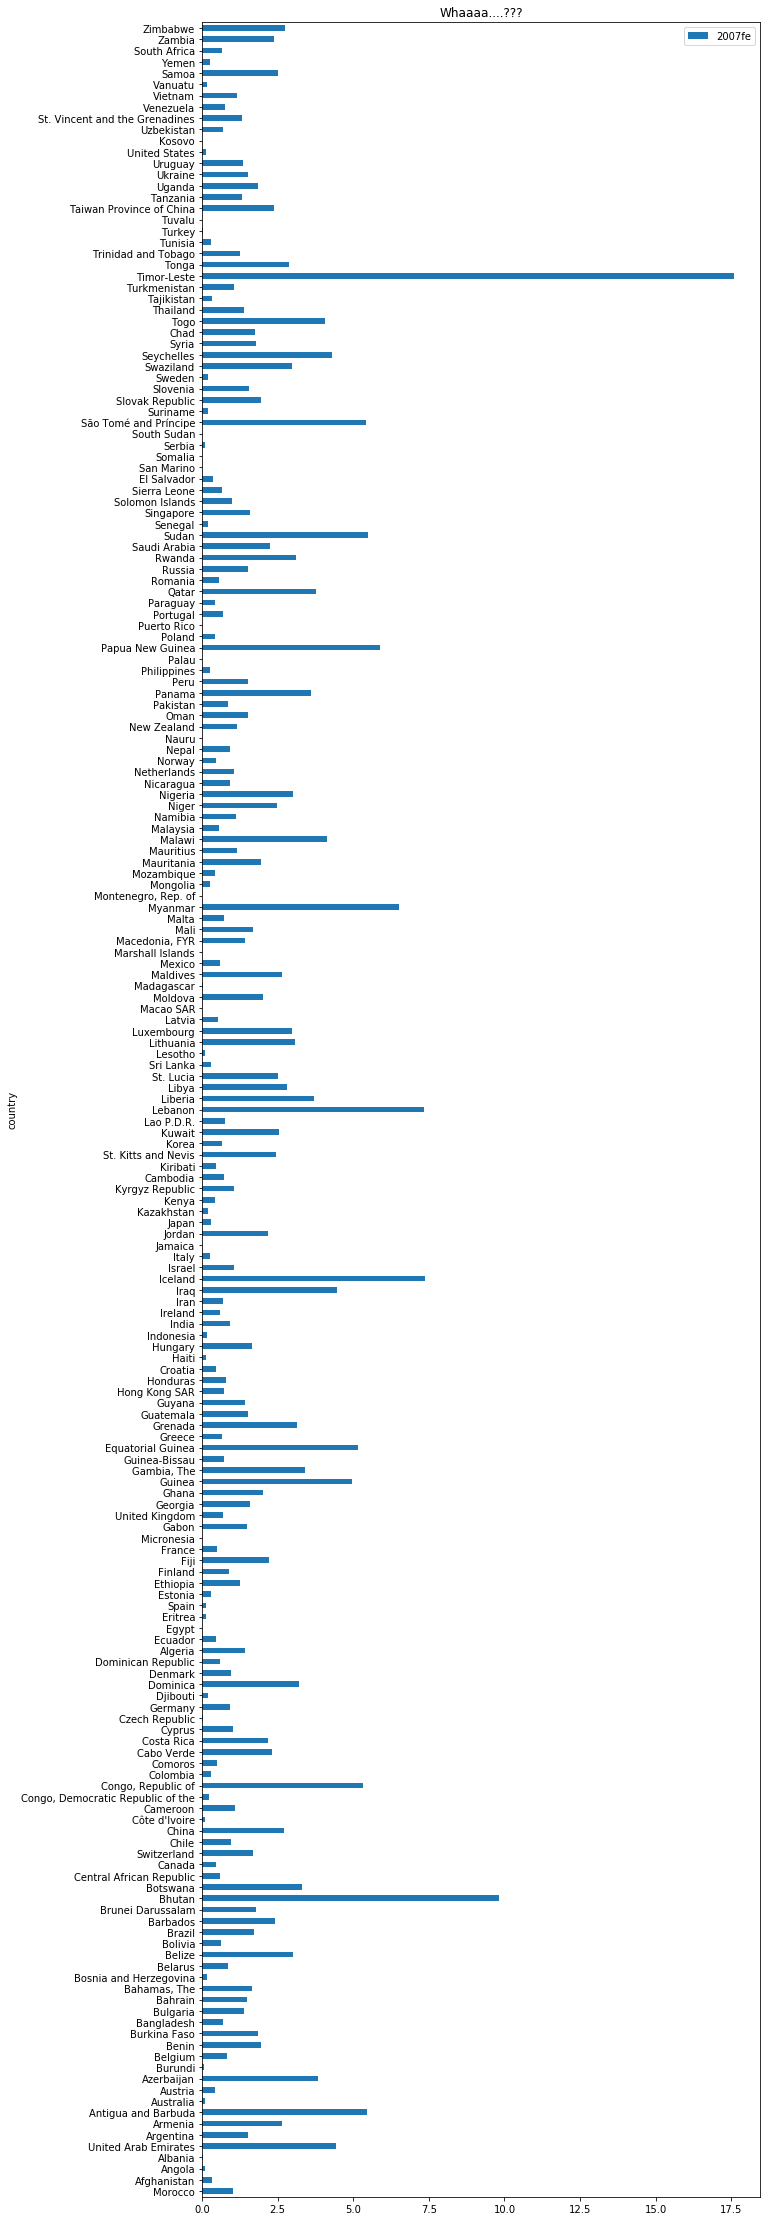

In [8]:
imf_df[['country', '2007fe']].plot(kind='barh',x='country', y='2007fe', figsize=(10, 40))
plt.title('Whaaaa....???')
plt.show()

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in imf_df.columns if imf_df[c].dtype in numerics]:
    imf_df[c] = imf_df[c].abs()

In [10]:
imf_df.head()

,iso_code,country,2007fe,2008fe,2009fe,2010fe,2011fe,2012fe,2013fe,2014fe,2015fe,2016fe,2017fe
0,MAR,Morocco,1.032,0.577,0.759,0.184,0.622,0.137,0.605,0.845,0.318,0.624,0.603
1,AFG,Afghanistan,0.315,3.619,4.928,0.425,0.588,8.745,2.622,0.542,0.731,0.367,0.005
2,AGO,Angola,0.102,2.156,2.172,2.430,0.193,1.653,1.268,0.765,0.488,0.813,0.754
3,ALB,Albania,0.017,1.385,2.654,1.107,0.045,0.917,0.698,0.326,0.470,0.036,0.232
4,ARE,United Arab Emirates,4.442,3.749,5.057,0.800,3.059,1.070,1.743,0.995,0.831,0.773,0.806


In [11]:
imf_df['abs_val'] = imf_df.sum(axis=1)

In [12]:
imf_df.head()

,iso_code,country,2007fe,2008fe,2009fe,2010fe,2011fe,2012fe,2013fe,2014fe,2015fe,2016fe,2017fe,abs_val
0,MAR,Morocco,1.032,0.577,0.759,0.184,0.622,0.137,0.605,0.845,0.318,0.624,0.603,6.306
1,AFG,Afghanistan,0.315,3.619,4.928,0.425,0.588,8.745,2.622,0.542,0.731,0.367,0.005,22.887
2,AGO,Angola,0.102,2.156,2.172,2.430,0.193,1.653,1.268,0.765,0.488,0.813,0.754,12.794
3,ALB,Albania,0.017,1.385,2.654,1.107,0.045,0.917,0.698,0.326,0.470,0.036,0.232,7.887
4,ARE,United Arab Emirates,4.442,3.749,5.057,0.800,3.059,1.070,1.743,0.995,0.831,0.773,0.806,23.325


In [13]:
imf_df.to_csv('df.csv')

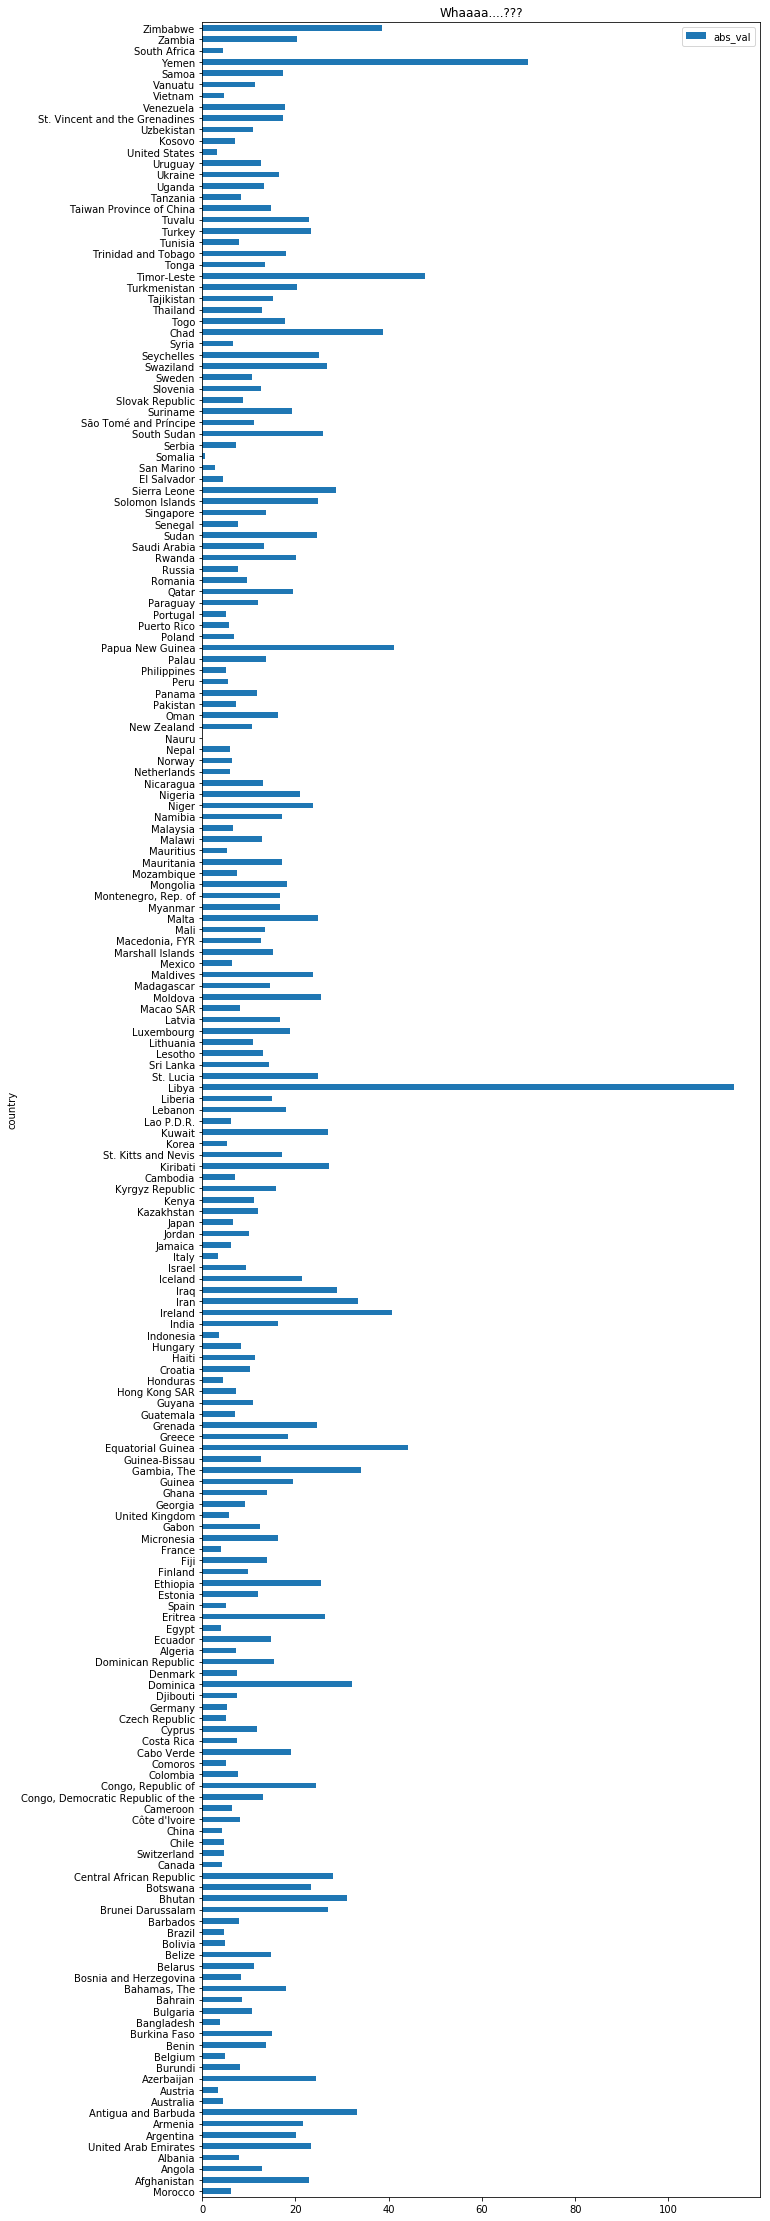

In [14]:
imf_df[['country', 'abs_val']].plot(kind='barh',x='country', y='abs_val', figsize=(10, 40))
plt.title('Whaaaa....???')
plt.show()

In [19]:
imf_df = imf_df.sort_values('abs_val')
imf_df.head()

,iso_code,country,2007fe,2008fe,2009fe,2010fe,2011fe,2012fe,2013fe,2014fe,2015fe,2016fe,2017fe,abs_val
129,NRU,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000
154,SOM,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.574,0.574
153,SMR,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.917,0.376,1.197,0.300,2.790
181,USA,United States,0.134,1.864,0.046,0.107,0.075,0.054,0.117,0.415,0.294,0.093,0.092,3.291
9,AUT,Austria,0.429,0.583,0.059,0.234,0.359,0.243,0.360,0.180,0.326,0.097,0.612,3.482


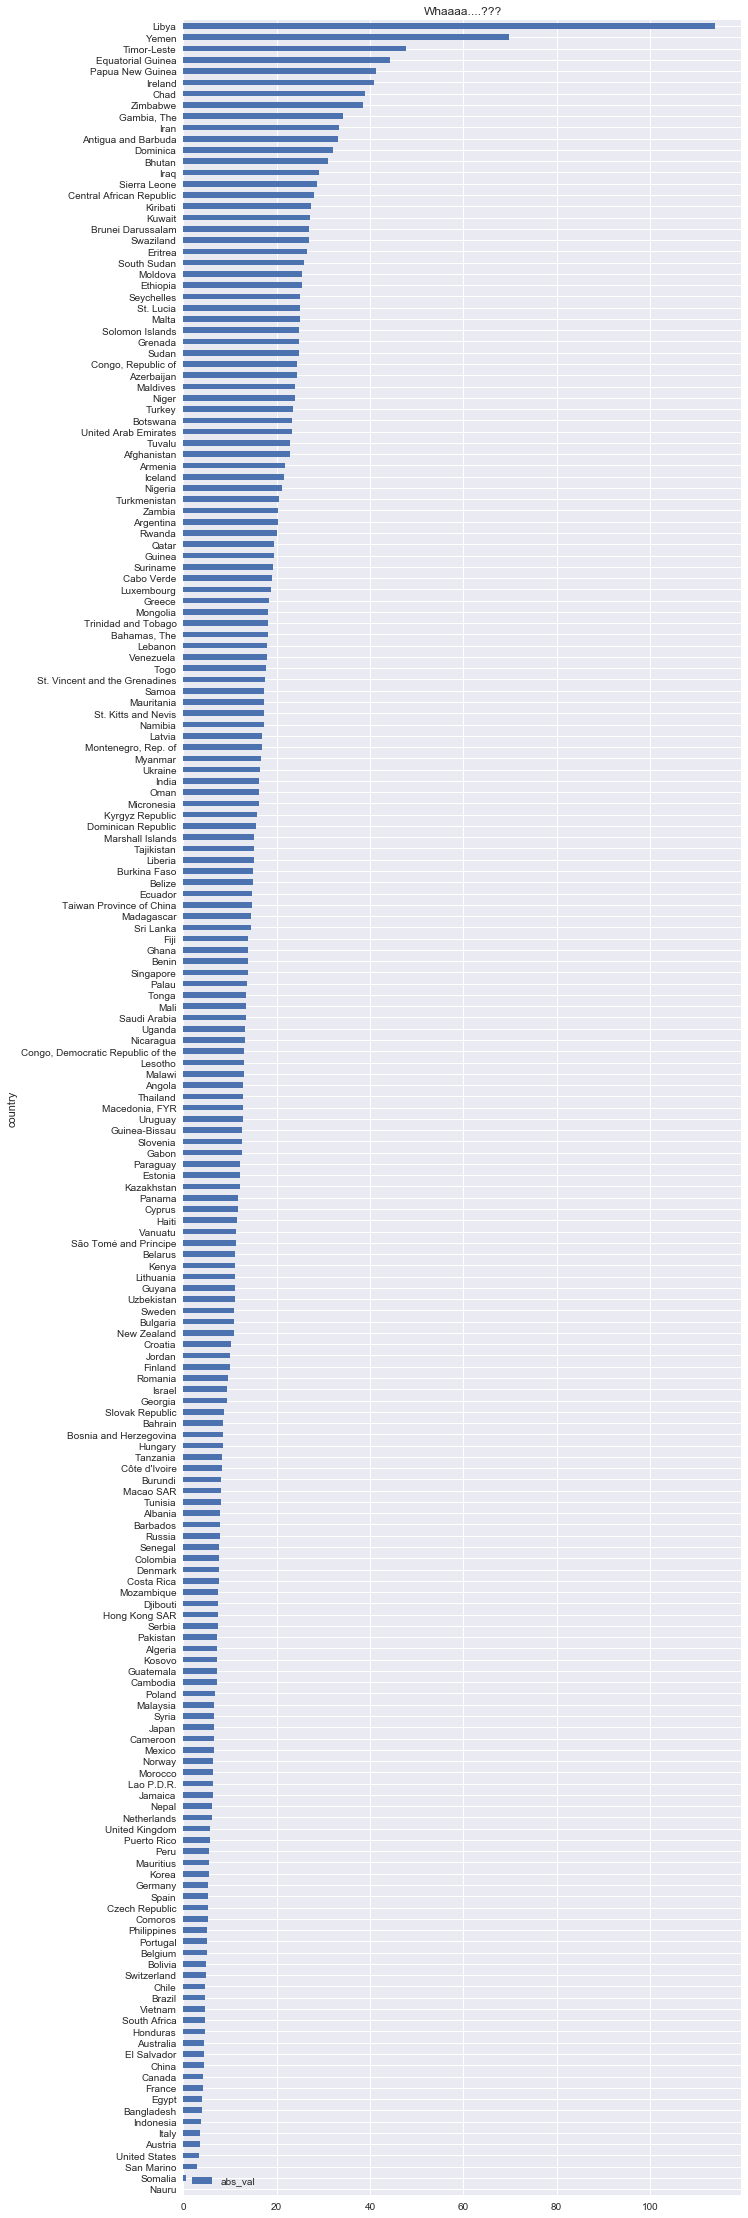

In [22]:
sns.set()
imf_df[['country', 'abs_val']].plot(kind='barh',x='country', y='abs_val', figsize=(10, 40))
plt.title('Whaaaa....???')
plt.show()